In [1]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for i in range(self.max_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            if errors == 0:
                print(f"Perceptron converged after {i+1} iterations.")
                return self
        print(f"Perceptron did not converge within {self.max_iter} iterations.")
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) > 0.0, 1, -1)

# Load the datasets
X_small = np.load('data_small.npy')
X_large = np.load('data_large.npy')

# Assuming the last column is the target variable
y_small = X_small[:, -1].astype(int)  # Ensure labels are integers
y_large = X_large[:, -1].astype(int)

# All columns except the last are features
X_small = X_small[:, :-1]
X_large = X_large[:, :-1]

# Create two Perceptron instances, one for each dataset
ppn_small = Perceptron(learning_rate=0.01, max_iter=1000)
ppn_large = Perceptron(learning_rate=0.01, max_iter=1000)

# Train the Perceptron instances on the datasets
ppn_small.fit(X_small, y_small)
ppn_large.fit(X_large, y_large)

# Compare the number of iterations required to converge for the large and small datasets
small_iterations = len(ppn_small.errors_) if ppn_small.errors_[-1] != 0 else len(ppn_small.errors_) - 1
large_iterations = len(ppn_large.errors_) if ppn_large.errors_[-1] != 0 else len(ppn_large.errors_) - 1

print("Number of iterations required for the small dataset: ", small_iterations)
print("Number of iterations required for the large dataset: ", large_iterations)


Perceptron did not converge within 1000 iterations.
Perceptron did not converge within 1000 iterations.
Number of iterations required for the small dataset:  1000
Number of iterations required for the large dataset:  1000


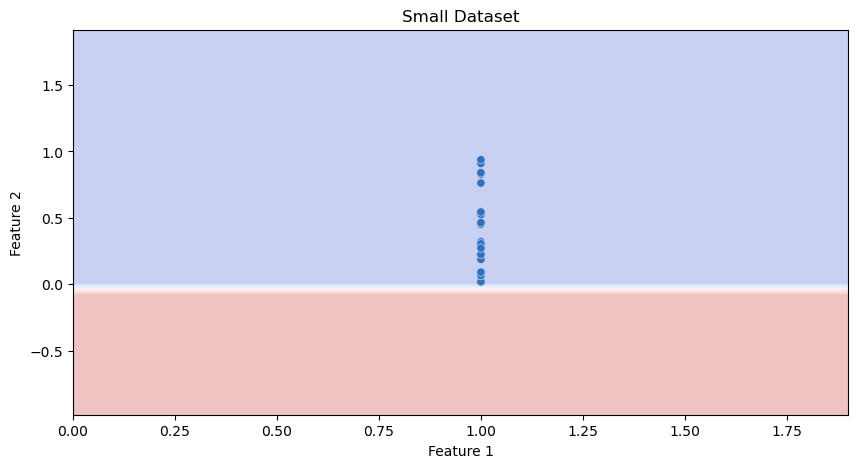

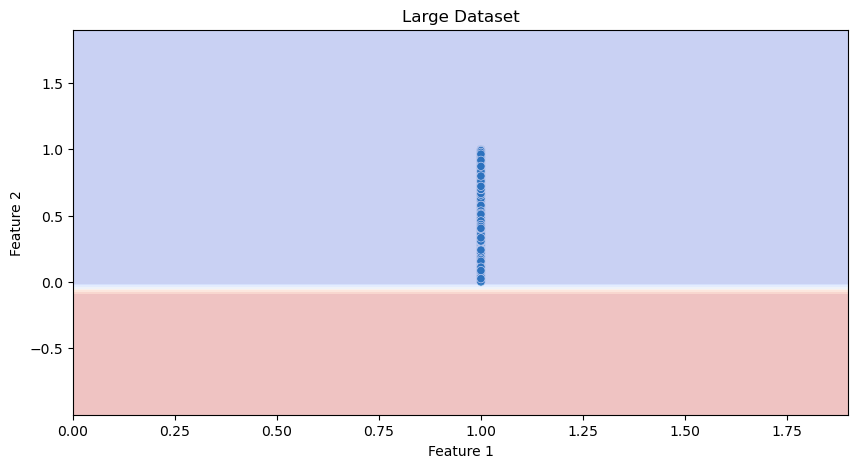

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the small dataset
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_small[:, 0], y=X_small[:, 1], hue=y_small, legend=False)
plt.title("Small Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the decision boundary for the small dataset
x_min, x_max = X_small[:, 0].min() - 1, X_small[:, 0].max() + 1
y_min, y_max = X_small[:, 1].min() - 1, X_small[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = ppn_small.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot the large dataset
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_large[:, 0], y=X_large[:, 1], hue=y_large, legend=False)
plt.title("Large Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the decision boundary for the large dataset
x_min, x_max = X_large[:, 0].min() - 1, X_large[:, 0].max() + 1
y_min, y_max = X_large[:, 1].min() - 1, X_large[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = ppn_large.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.show()

In [3]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit(self, X, y, init_weights=None):
        if init_weights is None:
            self.weights = np.zeros(1 + X.shape[1])
        else:
            self.weights = init_weights
        self.errors_ = []

        for i in range(self.max_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            if errors == 0:
                print(f"Perceptron converged after {i+1} iterations.")
                return self
        print(f"Perceptron did not converge within {self.max_iter} iterations.")
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) > 0.0, 1, -1)

# Load the small dataset
X_small = np.load('data_small.npy')
y_small = X_small[:, -1].astype(int)
X_small = X_small[:, :-1]

# Train the Perceptron algorithm multiple times with different initial weights
num_runs = 5
init_weights_list = [np.random.rand(1 + X_small.shape[1]) for _ in range(num_runs)]
learned_weights_list = []

for init_weights in init_weights_list:
    ppn = Perceptron(learning_rate=0.01, max_iter=1000)
    ppn.fit(X_small, y_small, init_weights=init_weights)
    learned_weights_list.append(ppn.weights)

# Compare the learned weights
print("Learned weights for each run:")
for i, learned_weights in enumerate(learned_weights_list):
    print(f"Run {i+1}: {learned_weights}")

Perceptron did not converge within 1000 iterations.
Perceptron did not converge within 1000 iterations.
Perceptron did not converge within 1000 iterations.
Perceptron did not converge within 1000 iterations.
Perceptron did not converge within 1000 iterations.
Learned weights for each run:
Run 1: [ 0.34159246 -0.3231019  -0.02434448]
Run 2: [-0.18537929  0.17355515  0.02290317]
Run 3: [-0.4799448   0.46226311  0.02561193]
Run 4: [ 0.01269991 -0.01226827  0.00420283]
Run 5: [ 0.26488837 -0.2747555   0.02091821]
